In [1]:
import warnings
import itertools
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.tsa.api as smt
import statsmodels.formula.api as smf
from io import StringIO
import requests
import matplotlib.pyplot as plt
%matplotlib inline
import os

plt.style.use('bmh')

C:\Users\AKHIL\Anaconda3\lib\site-packages\matplotlib\__init__.py:1004: UserWarning: could not find rc file; returning defaults
  warnings.warn(message)


In [2]:
os.chdir("F:\BA\Python\Time Series\Case Studies - Questions with Solutions-20190825\Case 1")

In [3]:
data=pd.read_csv("Tractor-Sales.csv")

In [4]:
data.head()

,Month-Year,Number of Tractor Sold
0,Jan-03,141
1,Feb-03,157
2,Mar-03,185
3,Apr-03,199
4,May-03,203


In [5]:
data.shape

(144, 2)

In [6]:
dates=pd.date_range(start='2003-01-01',freq='MS',periods=len(data))

In [7]:
dates

DatetimeIndex(['2003-01-01', '2003-02-01', '2003-03-01', '2003-04-01',
               '2003-05-01', '2003-06-01', '2003-07-01', '2003-08-01',
               '2003-09-01', '2003-10-01',
               ...
               '2014-03-01', '2014-04-01', '2014-05-01', '2014-06-01',
               '2014-07-01', '2014-08-01', '2014-09-01', '2014-10-01',
               '2014-11-01', '2014-12-01'],
              dtype='datetime64[ns]', length=144, freq='MS')

In [8]:
data["Month"]=dates.month
data.head()

,Month-Year,Number of Tractor Sold,Month
0,Jan-03,141,1
1,Feb-03,157,2
2,Mar-03,185,3
3,Apr-03,199,4
4,May-03,203,5


In [9]:
data["Year"]=dates.year
data.head()

,Month-Year,Number of Tractor Sold,Month,Year
0,Jan-03,141,1,2003
1,Feb-03,157,2,2003
2,Mar-03,185,3,2003
3,Apr-03,199,4,2003
4,May-03,203,5,2003


In [10]:
import calendar
data["Month"]=data["Month"].apply(lambda x: calendar.month_abbr[x])
data.head()

,Month-Year,Number of Tractor Sold,Month,Year
0,Jan-03,141,Jan,2003
1,Feb-03,157,Feb,2003
2,Mar-03,185,Mar,2003
3,Apr-03,199,Apr,2003
4,May-03,203,May,2003


In [11]:
data.drop(["Month-Year"],axis=1,inplace=True)

In [12]:
data.head()

,Number of Tractor Sold,Month,Year
0,141,Jan,2003
1,157,Feb,2003
2,185,Mar,2003
3,199,Apr,2003
4,203,May,2003


In [13]:
data.rename(columns={"Number of Tractor Sold":"Sale"},inplace=True)

In [14]:
data.head()

,Sale,Month,Year
0,141,Jan,2003
1,157,Feb,2003
2,185,Mar,2003
3,199,Apr,2003
4,203,May,2003


In [15]:
data.set_index(dates,inplace=True)

In [16]:
data.head()

,Sale,Month,Year
2003-01-01,141,Jan,2003
2003-02-01,157,Feb,2003
2003-03-01,185,Mar,2003
2003-04-01,199,Apr,2003
2003-05-01,203,May,2003


In [17]:
df=data.copy()

In [18]:
df.drop(["Month","Year"],axis=1,inplace=True)

In [19]:
df.head()

,Sale
2003-01-01,141
2003-02-01,157
2003-03-01,185
2003-04-01,199
2003-05-01,203


In [20]:
from datetime import datetime

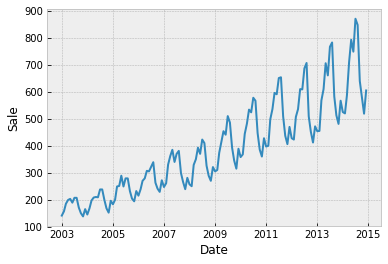

In [21]:
# Plot graph
plt.xlabel("Date")
plt.ylabel("Sale")
plt.plot(df)

In [22]:
#determining rolling statistics
rolmean=df.rolling(window=12).mean()
rolstd=df.rolling(window=12).std()
print(rolmean,rolstd)


                  Sale
2003-01-01         NaN
2003-02-01         NaN
2003-03-01         NaN
2003-04-01         NaN
2003-05-01         NaN
2003-06-01         NaN
2003-07-01         NaN
2003-08-01         NaN
2003-09-01         NaN
2003-10-01         NaN
2003-11-01         NaN
2003-12-01  176.000000
2004-01-01  176.333333
2004-02-01  177.250000
2004-03-01  178.250000
2004-04-01  179.000000
2004-05-01  179.583333
2004-06-01  181.250000
2004-07-01  183.833333
2004-08-01  186.416667
2004-09-01  188.750000
2004-10-01  190.250000
2004-11-01  191.416667
2004-12-01  194.000000
2005-01-01  197.166667
2005-02-01  199.833333
2005-03-01  204.166667
2005-04-01  207.750000
2005-05-01  214.333333
2005-06-01  217.666667
...                ...
2012-07-01  523.000000
2012-08-01  527.416667
2012-09-01  527.416667
2012-10-01  528.666667
2012-11-01  529.166667
2012-12-01  529.333333
2013-01-01  531.500000
2013-02-01  534.166667
2013-03-01  539.250000
2013-04-01  545.416667
2013-05-01  553.416667
2013-06-01 

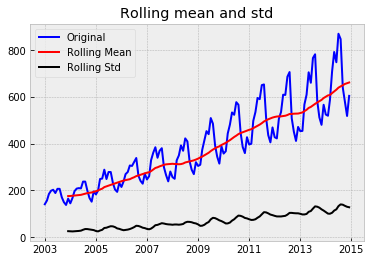

In [23]:
#plot roll statistics
orig=plt.plot(df,color="blue",label="Original")
mean=plt.plot(rolmean,color="red",label="Rolling Mean")
std=plt.plot(rolstd,color="black",label="Rolling Std")
plt.legend(loc="best")
plt.title("Rolling mean and std")
plt.show()

In [26]:
from statsmodels.tsa.seasonal import seasonal_decompose

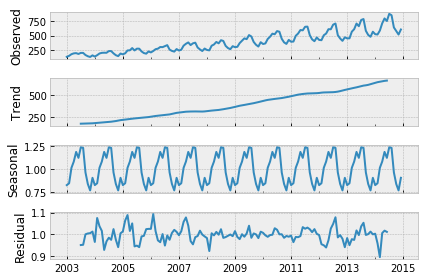

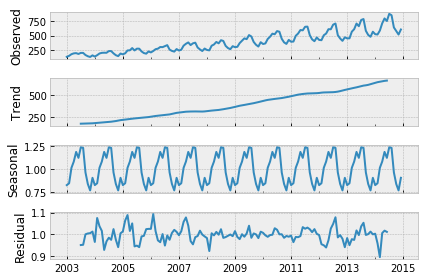

In [27]:
ts_decompose=seasonal_decompose(df,model="multiplicative",freq=12)
ts_decompose.plot()

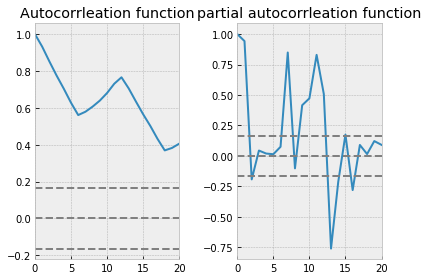

In [30]:
#plot ACF and PACF
from statsmodels.tsa.stattools import acf,pacf

lag_acf=acf( df, nlags=20)
lag_pacf=pacf( df,nlags=20,method="ols")

#plot ACF
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color="gray")
plt.axhline(y=-1.96/np.sqrt(len(df)),linestyle="--",color="gray")
plt.axhline(y=1.96/np.sqrt(len(df)),linestyle="--",color="gray")
plt.title("Autocorrleation function")
plt.xlim([0,20])


#plot PACF
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color="gray")
plt.axhline(y=-1.96/np.sqrt(len(df)),linestyle="--",color="gray")
plt.axhline(y=1.96/np.sqrt(len(df)),linestyle="--",color="gray")
plt.title("partial autocorrleation function")
plt.xlim([0,20])
plt.tight_layout()

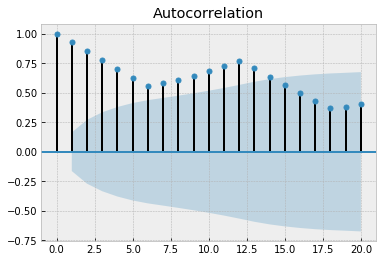

In [31]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
acf_plot=plot_acf(df,lags=20)


In [32]:
# Null hypothesis rejected only For lag=1 (i.e. auto_correlation is statisticaly significant)

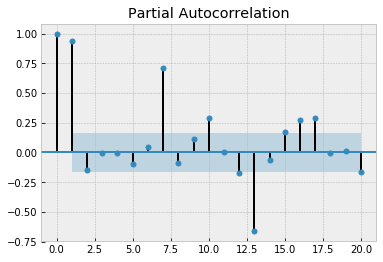

In [33]:
pacf_plot=plot_pacf(df,lags=20)

In [34]:
# Define the d and q parameters to take any value between 0 and 1
q = d = range(0, 2)
# Define the p parameters to take any value between 0 and 3
p = range(0, 4)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [35]:
warnings.filterwarnings("ignore") # specify to ignore warning messages

AIC = []
SARIMAX_model = []
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(df,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('SARIMAX{}x{} - AIC:{}'.format(param, param_seasonal, results.aic), end='\r')
            AIC.append(results.aic)
            SARIMAX_model.append([param, param_seasonal])
        except:
            continue

In [36]:
print('The smallest AIC is {} for model SARIMAX{}x{}'.format(min(AIC), SARIMAX_model[AIC.index(min(AIC))][0],SARIMAX_model[AIC.index(min(AIC))][1]))

The smallest AIC is 799.9064282670552 for model SARIMAX(3, 1, 0)x(3, 1, 1, 12)


In [37]:
SARIMAX_model[AIC.index(min(AIC))][0]

(3, 1, 0)

In [38]:
SARIMAX_model[AIC.index(min(AIC))][1]

(3, 1, 1, 12)

In [39]:
mod=sm.tsa.statespace.SARIMAX(df,
                             order=SARIMAX_model[AIC.index(min(AIC))][0],
                             seasonal_order=SARIMAX_model[AIC.index(min(AIC))][1],
                             eforce_stationarity=False,
                             enforce_invertibility=False)
results=mod.fit()

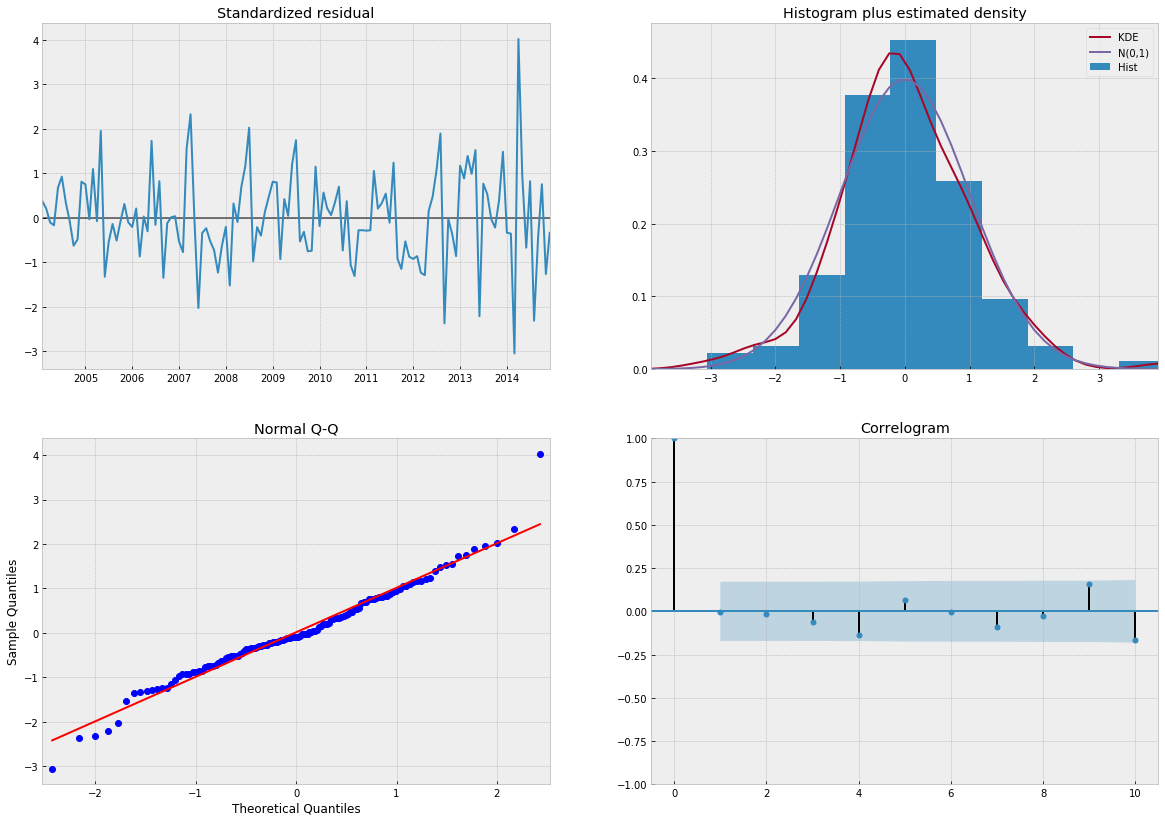

In [40]:
results.plot_diagnostics(figsize=(20,14))
plt.show()

In [41]:
df.tail()

,Sale
2014-08-01,848
2014-09-01,640
2014-10-01,581
2014-11-01,519
2014-12-01,605


In [42]:
df.head()

,Sale
2003-01-01,141
2003-02-01,157
2003-03-01,185
2003-04-01,199
2003-05-01,203


In [43]:
pred1=results.get_prediction(start="2003-01-01",dynamic=False)
pred1_ci=pred1.conf_int()

In [44]:
pred2=results.get_forecast("2015-01-01")
pred2_ci=pred2.conf_int()

In [45]:
pred0=results.get_prediction(start="2003-01-01",dynamic=False)
pred0_ci=pred0.conf_int()

pred1=results.get_prediction(start="2003-01-01",dynamic=True)
pred1_ci=pred1.conf_int()

pred2=results.get_forecast("2016-01-01")
pred2_ci=pred2.conf_int()

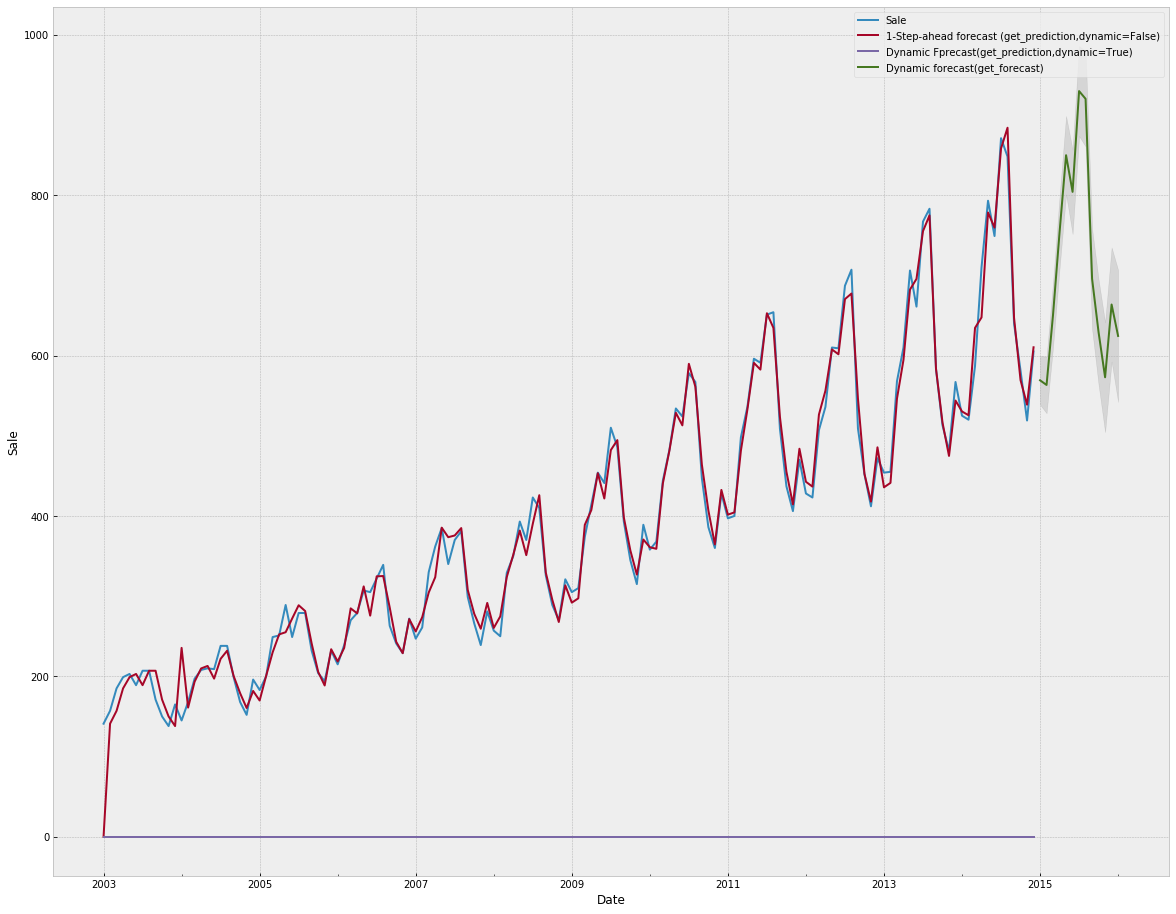

In [46]:
ax=df.plot(figsize=(20,16))
pred0.predicted_mean.plot(ax=ax,label="1-Step-ahead forecast (get_prediction,dynamic=False)")
pred1.predicted_mean.plot(ax=ax,label="Dynamic Fprecast(get_prediction,dynamic=True)")
pred2.predicted_mean.plot(ax=ax,label="Dynamic forecast(get_forecast)")
ax.fill_between(pred2_ci.index,pred2_ci.iloc[:,0],pred2_ci.iloc[:,1],color='k',alpha=.1)
plt.xlabel("Date")
plt.ylabel("Sale")
plt.legend()
plt.show()

In [47]:
y_actual=df["Sale"]
y_pred=pred0.predicted_mean

In [48]:
from sklearn.metrics import mean_absolute_error
MAE=mean_absolute_error(y_actual,y_pred)
MAE

13.946730984867742

In [49]:
from sklearn.metrics import mean_squared_error
MSE=mean_squared_error(y_actual,y_pred)
MSE

459.75983927520014

In [50]:
RMSE=np.sqrt(MSE)
RMSE

21.442011082806577

In [51]:
RMSE=np.mean(np.abs((y_actual - y_pred) / y_actual)) * 100
RMSE

4.752083419552634